# Utilizando janelas rolantes no Pandas

A função "rolling" do Pandas fornece cálculos em janelas rolantes.

Vamos utilizar exemplos de soma, z-score e retornos mínimos.

## Importando as bibliotecas

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

## Baixando os dados

In [2]:
data = yf.download('^BVSP', period='1y')

[*********************100%***********************]  1 of 1 completed


## Calculando os retornos

In [3]:
data['returns'] = data['Adj Close'].pct_change()

## Soma

Vamos fazer uma soma em janelas de 5 observações.

In [4]:
soma = data['returns'].rolling(window=5).sum()

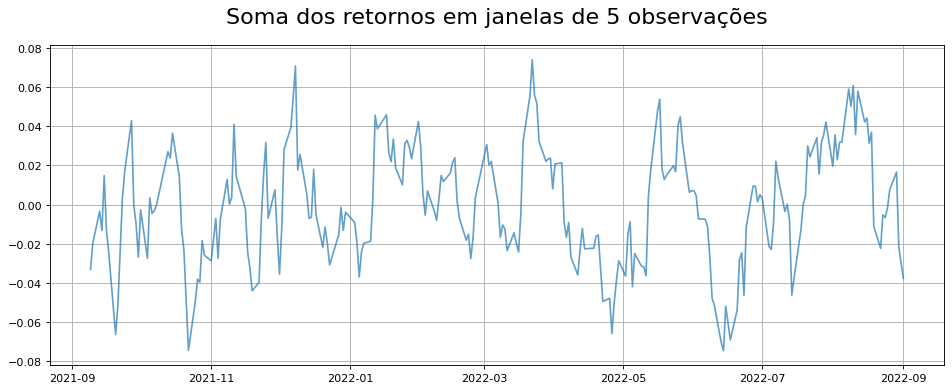

In [5]:
fig = plt.figure(figsize=(12, 5), dpi=80)
plt.title('Soma dos retornos em janelas de 5 observações', fontdict={'size':20, }, pad=20)

plt.plot(soma, color='tab:blue', alpha=0.7, lw=1.5)
plt.grid(True)

plt.tight_layout()
plt.show();

## Z-Score

O z-score é o número de desvios padrão que um valor está distante de sua média.

O cálculo é feito da seguinte forma: **_(valor - média) / desvio padrão_**

In [6]:
def zscore(df_window):
    return (df_window[-1] - df_window.mean()) / df_window.std()

In [7]:
df_zscore = data['Adj Close'].rolling(20).apply(zscore)

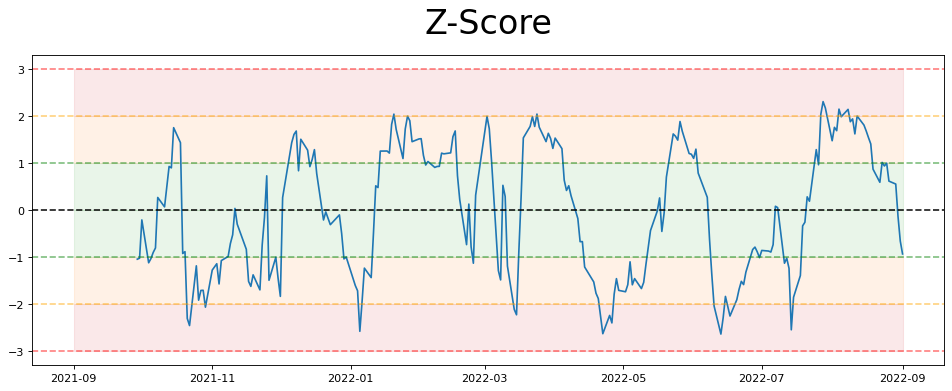

In [8]:
fig = plt.figure(figsize=(12, 5), dpi=80)
plt.title('Z-Score', fontdict={'size':30, }, pad=20)

plt.plot(df_zscore, color='tab:blue', lw=1.5)

plt.axhline(0, ls='--', color='black', alpha=0.9, lw=1.5)
plt.axhline(1, ls='--', color='green', alpha=0.5, lw=1.5)
plt.axhline(-1, ls='--', color='green', alpha=0.5, lw=1.5)
plt.axhline(2, ls='--', color='orange', alpha=0.5, lw=1.5)
plt.axhline(-2, ls='--', color='orange', alpha=0.5, lw=1.5)
plt.axhline(3, ls='--', color='red', alpha=0.5, lw=1.5)
plt.axhline(-3, ls='--', color='red', alpha=0.5, lw=1.5)

plt.fill_between(df_zscore.index, -3, -2, color='tab:red', alpha=0.1)
plt.fill_between(df_zscore.index, 2, 3, color='tab:red', alpha=0.1)

plt.fill_between(df_zscore.index, -2, -1, color='tab:orange', alpha=0.1)
plt.fill_between(df_zscore.index, 1, 2, color='tab:orange', alpha=0.1)

plt.fill_between(df_zscore.index, -1, -0, color='tab:green', alpha=0.1)
plt.fill_between(df_zscore.index, 0, 1, color='tab:green', alpha=0.1)

plt.tight_layout()
plt.show();

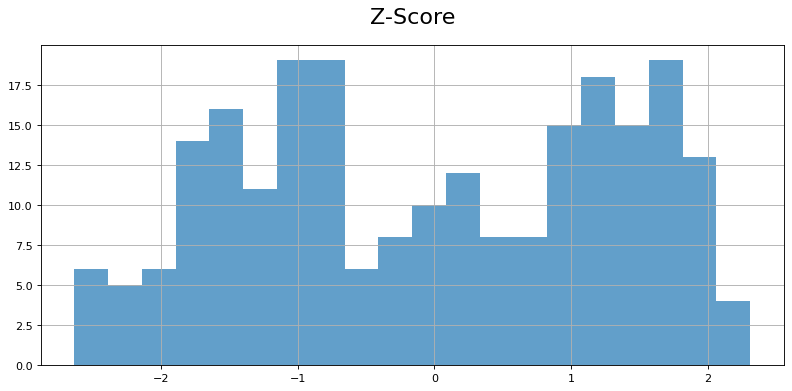

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=80)
plt.title('Z-Score', fontdict={'size':20, }, pad=20)

plt.hist(x=df_zscore, bins=20, color='tab:blue', alpha=0.7)
plt.grid(True)

plt.tight_layout()
plt.show();

## Janela de Retornos Mínimos

Vamos dar uma olhada na maior queda percentual em períodos contínuos de 5 dias.

In [10]:
min_pct_change = data['returns'].rolling(window=5).min()

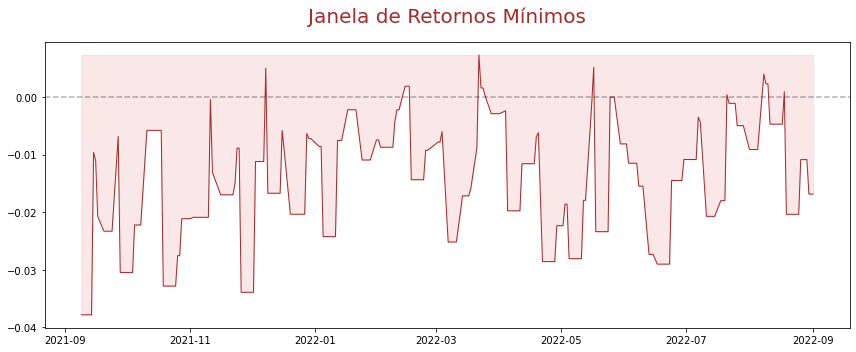

In [11]:
fig = plt.figure(figsize=(12,5))
plt.title('Janela de Retornos Mínimos', fontdict={'size':20, 'color':'brown'}, pad=20)
plt.plot(min_pct_change, color='brown', lw=1)
plt.axhline(0, ls='--', color='black', alpha=0.3)
plt.fill_between(min_pct_change.index, min_pct_change.max(), min_pct_change, color='tab:red', alpha=0.1)

plt.tight_layout()
plt.show();